# Hepatitis Risk Assessment: Predictive Modeling with Machine Learning

## Problem 
Hepatitis is a significant global health concern, affecting millions of individuals and posing a considerable burden on healthcare systems. Early detection and accurate prediction of hepatitis can lead to timely interventions, improved patient outcomes, and effective public health strategies. However, traditional diagnostic methods often have limitations in terms of accuracy and efficiency. There is a pressing need for a machine learning-based approach that can effectively predict the risk of hepatitis and aid in early identification of individuals who are likely to develop the disease.

## Objective
Develop a machine learning model to accurately predict the risk of hepatitis by analyzing relevant factors, aiding in early identification and intervention.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
# Colnames 
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG",
             "LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE",
             "SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

data = pd.read_csv('../data//hepatitis.data', names=col_names)
data.head() 

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(155, 20)

In [4]:
# dtypes 
data.dtypes

Class               int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [12]:
# Replace ? with 0
data = data.replace('?',0)
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [18]:
# Convert from one dt to another
data.columns[data.dtypes == 'object']
data[['STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
      'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']] =  data[['STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
      'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']].astype(float).astype(int)
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0,135,42,3,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0,96,32,4,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,0,200,4,0,1


In [19]:
data[['BILIRUBIN','ALBUMIN']] = data[['BILIRUBIN','ALBUMIN']].astype(float)
data.head() 

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.0,135,42,3.0,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.0,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.0,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [20]:
data[['Class','SEX']] = data[['Class','SEX']].astype(object)
data.head() 

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.0,135,42,3.0,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.0,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.0,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    object 
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    object 
 3   STEROID          155 non-null    int32  
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    int32  
 6   MALAISE          155 non-null    int32  
 7   ANOREXIA         155 non-null    int32  
 8   LIVER BIG        155 non-null    int32  
 9   LIVER FIRM       155 non-null    int32  
 10  SPLEEN PALPABLE  155 non-null    int32  
 11  SPIDERS          155 non-null    int32  
 12  ASCITES          155 non-null    int32  
 13  VARICES          155 non-null    int32  
 14  BILIRUBIN        155 non-null    float64
 15  ALK PHOSPHATE    155 non-null    int32  
 16  SGOT             155 non-null    int32  
 17  ALBUMIN         

In [22]:
# check missing data 
data.isnull().sum() 

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

## Descriptive statistics

In [23]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,2,1,2,2,1,2,2,2,2,2,0.0,135,42,3.0,0,1
2,78,2,2,1,2,2,2,2,2,2,2,2,0.0,96,32,4.0,0,1
3,31,0,1,2,2,2,2,2,2,2,2,2,0.0,46,52,4.0,80,1
4,34,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [25]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['AGE', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,AGE,155.0,41.2000,12.5659,1.0093,39.2061,43.1939
1,STEROID,155.0,1.4968,0.5144,0.0413,1.4152,1.5784
2,ANTIVIRALS,155.0,1.8452,0.3629,0.0292,1.7876,1.9027
3,FATIGUE,155.0,1.3419,0.4894,0.0393,1.2643,1.4196
4,MALAISE,155.0,1.5935,0.5058,0.0406,1.5133,1.6738
5,ANOREXIA,155.0,1.7806,0.4305,0.0346,1.7123,1.8490
6,LIVER BIG,155.0,1.7097,0.5807,0.0466,1.6175,1.8018
7,LIVER FIRM,155.0,1.4710,0.6274,0.0504,1.3714,1.5705
8,SPLEEN PALPABLE,155.0,1.7419,0.5076,0.0408,1.6614,1.8225
9,SPIDERS,155.0,1.6065,0.5524,0.0444,1.5188,1.6941


In [26]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,Class,SEX
0,2,2
1,2,1
2,2,1
3,2,1
4,2,1


In [28]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['Class', 'SEX']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,Class,2,123,79.35
1,,1,32,20.65
2,SEX,1,139,89.68
3,,2,16,10.32


## Correlations between Variables 

In [29]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

C:\Users\JHossain\AppData\Local\Temp\ipykernel_20536\427603040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
AGE,1.000000,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.123546,0.045328,0.078021,-0.215645,-0.059956,0.170780
STEROID,-0.067710,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.000321,-0.042245,-0.021032,0.203561,0.032994,-0.070144
ANTIVIRALS,-0.013100,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.161671,0.041764,0.095980,-0.154318,-0.276452,0.209242
FATIGUE,-0.264635,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.246897,-0.110505,-0.175476,0.234946,0.073783,-0.131177
MALAISE,-0.099516,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.253914,-0.114810,-0.177297,0.274981,0.067186,-0.116964
ANOREXIA,0.100589,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.240332,0.035984,-0.188183,0.152168,0.108322,-0.049702
LIVER BIG,-0.126358,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.043260,0.018895,-0.026293,0.103349,0.174677,-0.104757
LIVER FIRM,-0.100979,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.075869,-0.179977,-0.149876,0.096499,0.083312,-0.206632
SPLEEN PALPABLE,-0.127258,0.071401,-0.183070,0.226850,0.145236,0.185004,0.338963,0.322955,1.000000,0.515462,0.495691,0.574616,-0.177461,-0.160211,-0.116444,0.204411,0.124451,-0.100840
SPIDERS,-0.206551,0.029781,-0.176367,0.380935,0.376666,0.371874,0.370229,0.407114,0.515462,1.000000,0.553650,0.609491,-0.240555,-0.136225,-0.180494,0.185624,0.204276,-0.246077


## Skewness 

In [30]:
# skew 
data.skew() 

Class             -1.464700
AGE                0.365294
SEX                2.633738
STEROID           -0.131978
ANTIVIRALS        -1.926980
FATIGUE            0.503794
MALAISE           -0.536814
ANOREXIA          -1.614447
LIVER BIG         -1.880107
LIVER FIRM        -0.768247
SPLEEN PALPABLE   -1.841965
SPIDERS           -1.017367
ASCITES           -2.453535
VARICES           -2.608785
BILIRUBIN          2.526856
ALK PHOSPHATE      0.692180
SGOT               3.159754
ALBUMIN           -1.266422
PROTIME            0.369567
HISTOLOGY          0.196367
dtype: float64

## Data visualizations

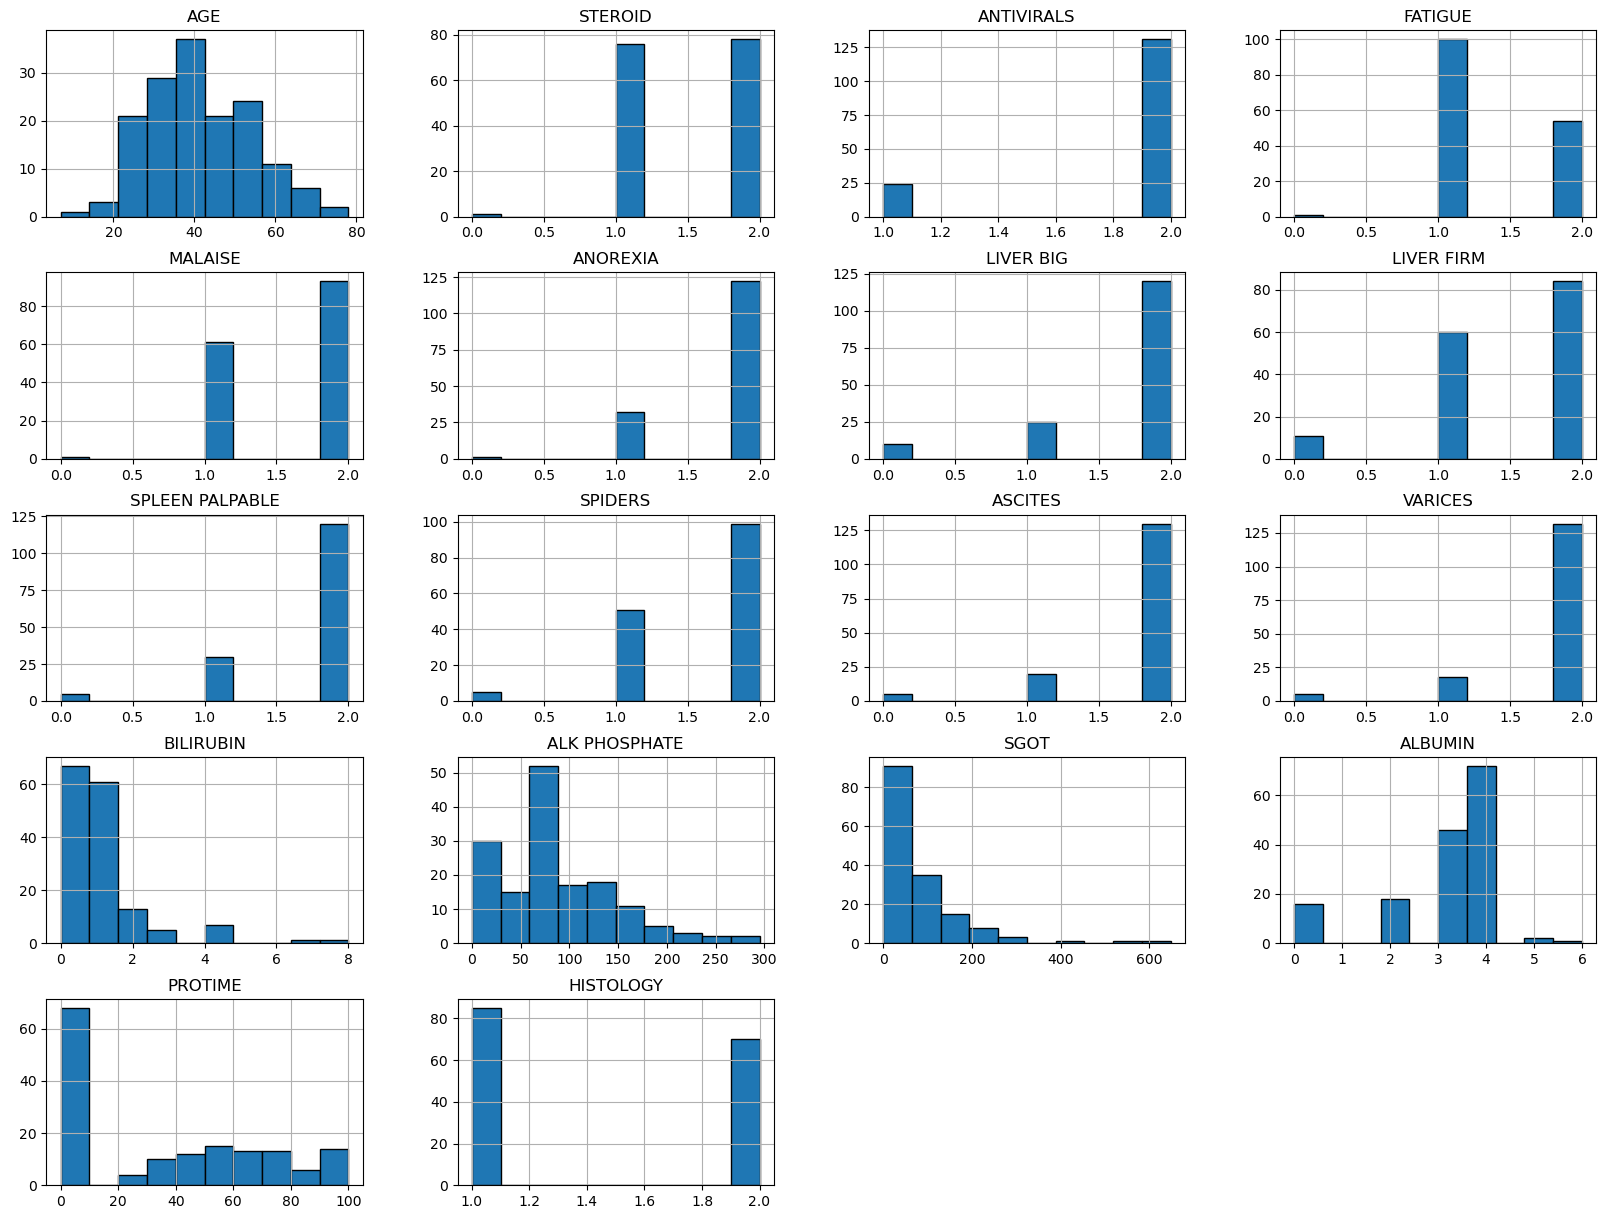

In [32]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,15), edgecolor='black')
plt.show() 

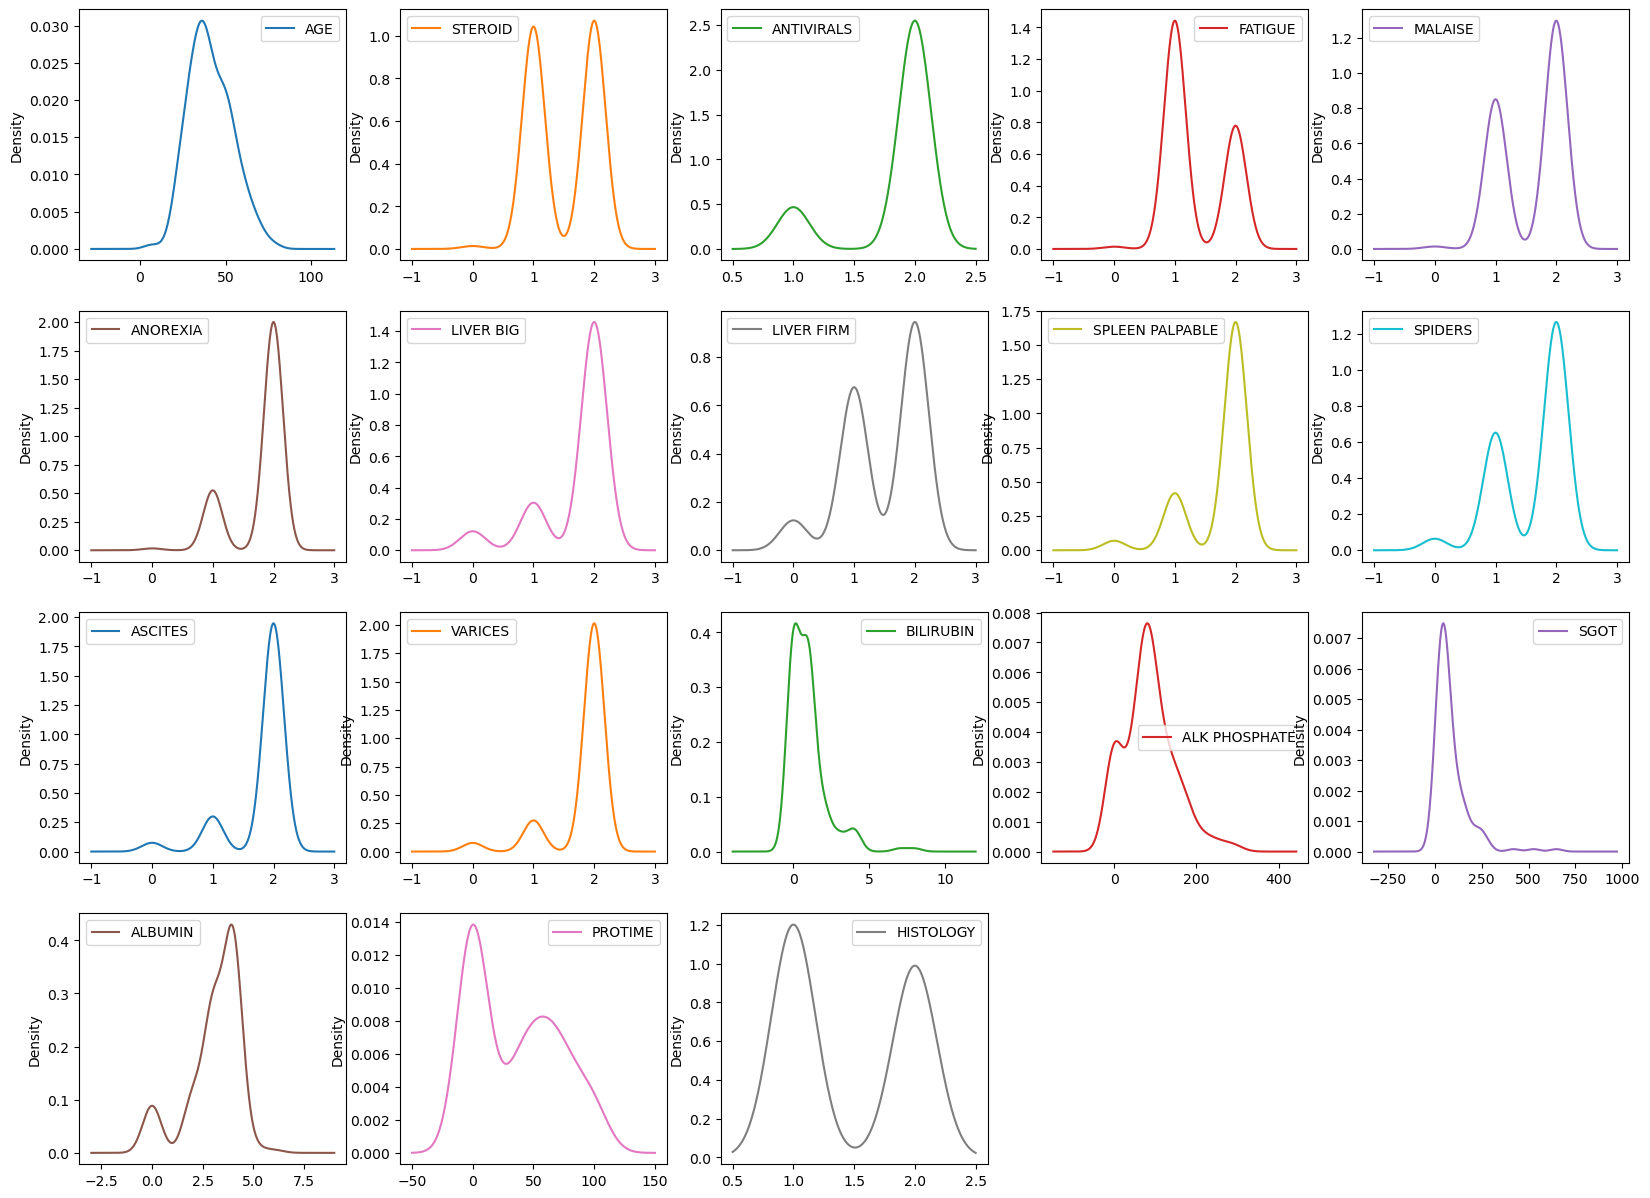

In [33]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,15), layout=(4,5))
plt.show() 

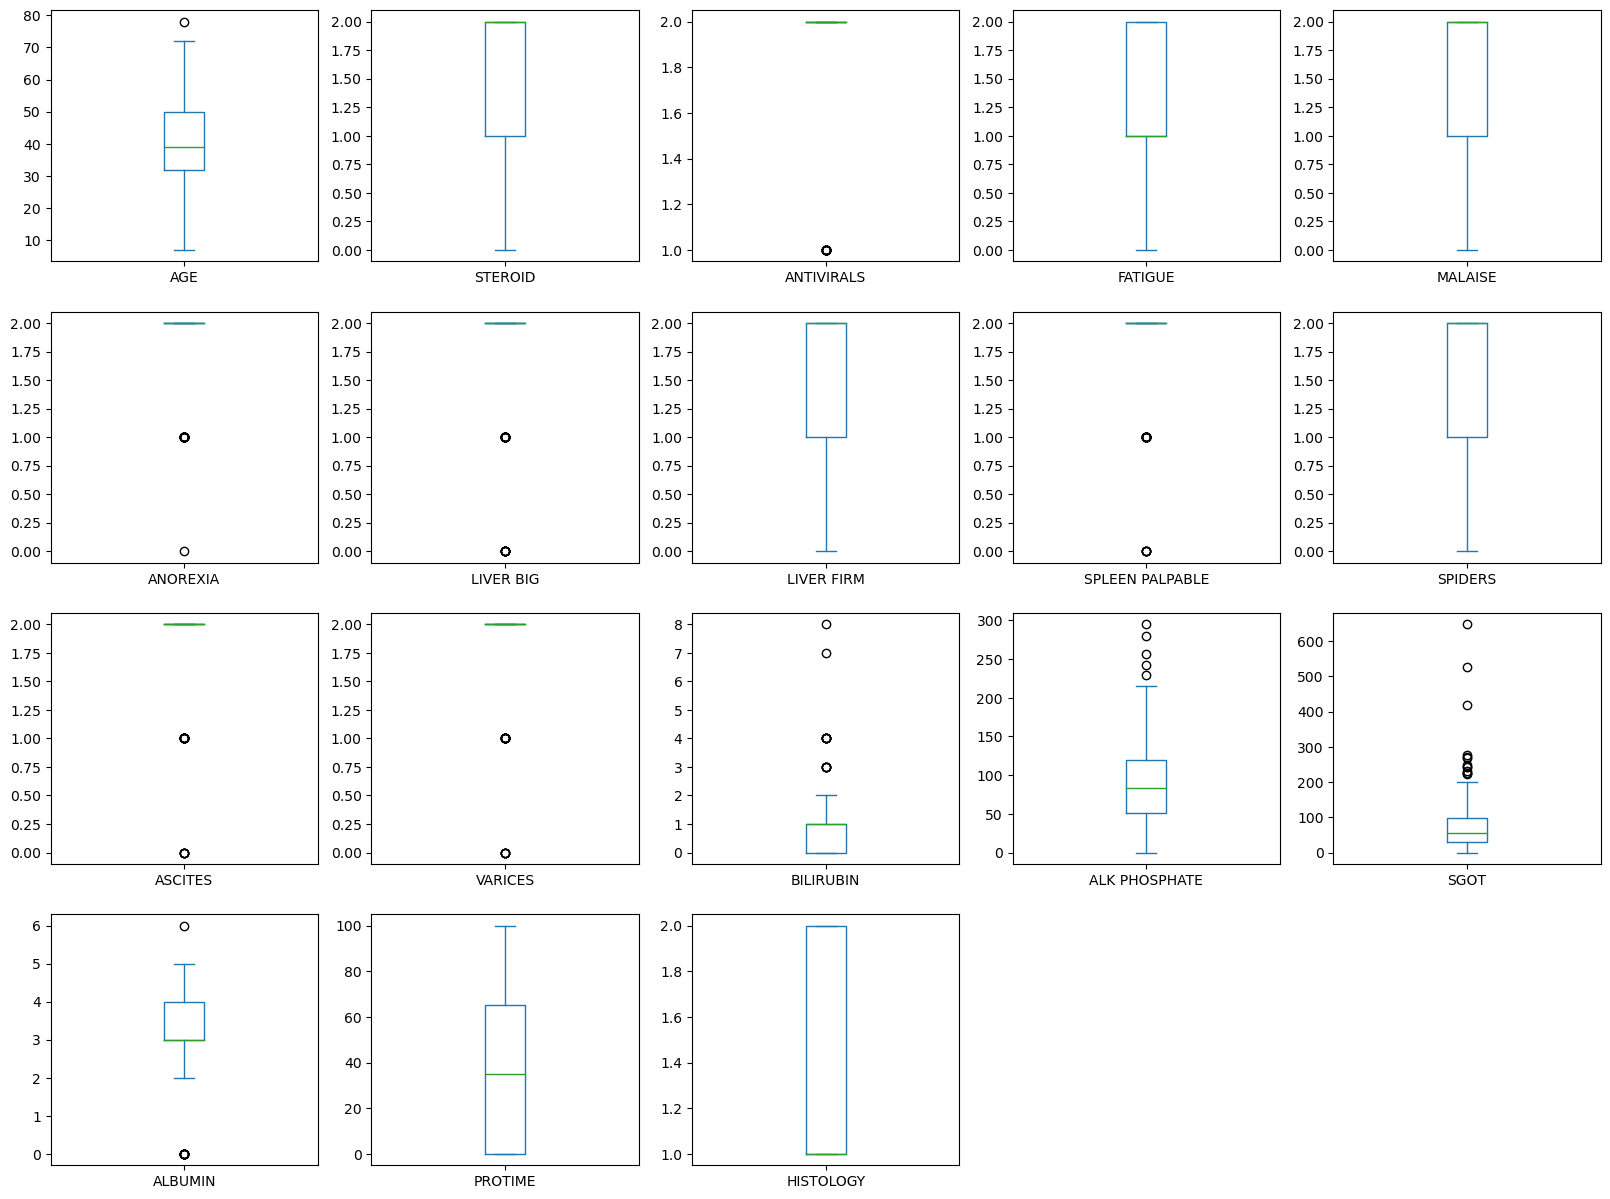

In [34]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,15), layout=(4,5))
plt.show() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_20536\667096660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


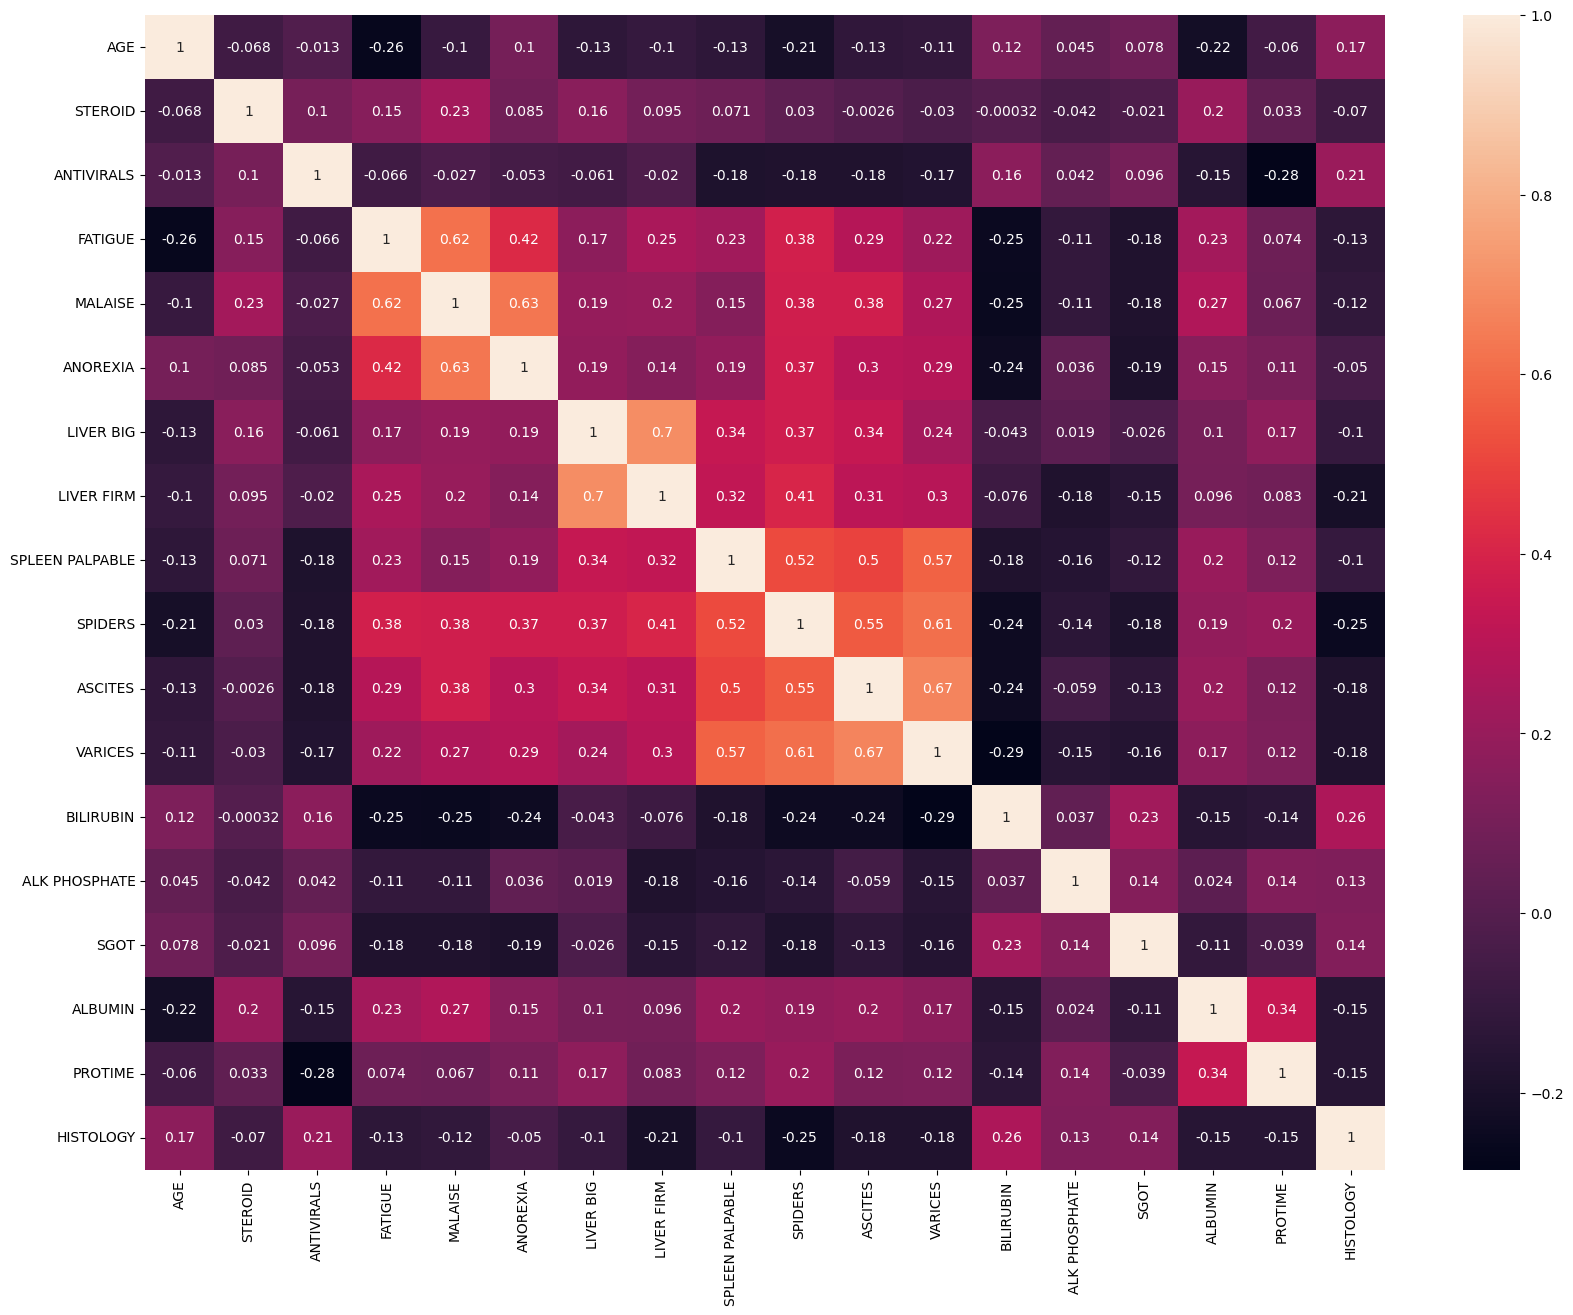

In [35]:
# Multivariate plots with correlations 
plt.figure(figsize=(20,15))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [36]:
# exmine first few rows of data 
data.head() 

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.0,135,42,3.0,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.0,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.0,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [37]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'Class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(155, 20)"
5,Transformed data shape,"(155, 20)"
6,Transformed train set shape,"(108, 20)"
7,Transformed test set shape,"(47, 20)"
8,Ordinal features,1
9,Numeric features,18


## Compare Models 

In [38]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8527,0.7625,0.9083,0.9182,0.9084,0.4756,0.4904,0.3550
rf,Random Forest Classifier,0.8445,0.8486,0.9542,0.8663,0.9074,0.3947,0.4109,0.4180
gbc,Gradient Boosting Classifier,0.8445,0.8556,0.9444,0.8778,0.9075,0.4177,0.4411,0.3870
et,Extra Trees Classifier,0.8355,0.8514,0.9306,0.8760,0.9001,0.3912,0.4058,0.4180
lr,Logistic Regression,0.8264,0.8500,0.9083,0.8819,0.8931,0.3996,0.4108,0.8670
ridge,Ridge Classifier,0.8264,0.0000,0.9208,0.8724,0.8937,0.3839,0.3983,0.3510
lightgbm,Light Gradient Boosting Machine,0.8264,0.8319,0.9306,0.8679,0.8949,0.3766,0.3902,0.4770
qda,Quadratic Discriminant Analysis,0.8255,0.5847,0.9778,0.8371,0.8998,0.2293,0.2427,0.3560
ada,Ada Boost Classifier,0.8164,0.8090,0.9097,0.8702,0.8873,0.3717,0.3846,0.3690
lda,Linear Discriminant Analysis,0.8164,0.8431,0.8972,0.8799,0.8858,0.3743,0.3852,0.3560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [39]:
# create model 
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.4444,0.8889,0.8000,0.8421,-0.1379,-0.1491
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.8889,0.7778,1.0000,0.8750,0.5600,0.6236
3,0.8182,0.5000,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.8182,0.8889,0.7778,1.0000,0.8750,0.5600,0.6236
5,0.7273,0.4444,0.8889,0.8000,0.8421,-0.1379,-0.1491
6,0.9091,0.9375,0.8750,1.0000,0.9333,0.7925,0.8101
7,0.9091,0.8333,1.0000,0.8889,0.9412,0.7442,0.7698
8,0.8000,0.6875,0.8750,0.8750,0.8750,0.3750,0.3750


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
# print model parameters
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


## Tune Model 

In [41]:
# tune hyperparameters of rf
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.6111,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.9091,0.9167,0.8889,1.0000,0.9412,0.7442,0.7698
2,0.9091,0.6944,1.0000,0.9000,0.9474,0.6207,0.6708
3,0.8182,0.5833,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.7273,0.8611,0.7778,0.8750,0.8235,0.2326,0.2406
5,0.7273,0.7778,0.8889,0.8000,0.8421,-0.1379,-0.1491
6,0.8182,0.8750,0.8750,0.8750,0.8750,0.5417,0.5417
7,0.9091,0.7917,1.0000,0.8889,0.9412,0.7442,0.7698
8,0.8000,0.8750,0.7500,1.0000,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.6111,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.9091,0.9167,0.8889,1.0000,0.9412,0.7442,0.7698
2,0.9091,0.6944,1.0000,0.9000,0.9474,0.6207,0.6708
3,0.8182,0.5833,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.7273,0.8611,0.7778,0.8750,0.8235,0.2326,0.2406
5,0.7273,0.7778,0.8889,0.8000,0.8421,-0.1379,-0.1491
6,0.8182,0.8750,0.8750,0.8750,0.8750,0.5417,0.5417
7,0.9091,0.7917,1.0000,0.8889,0.9412,0.7442,0.7698
8,0.8000,0.8750,0.7500,1.0000,0.8571,0.5455,0.6124


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [46]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=No...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Analyze Model 

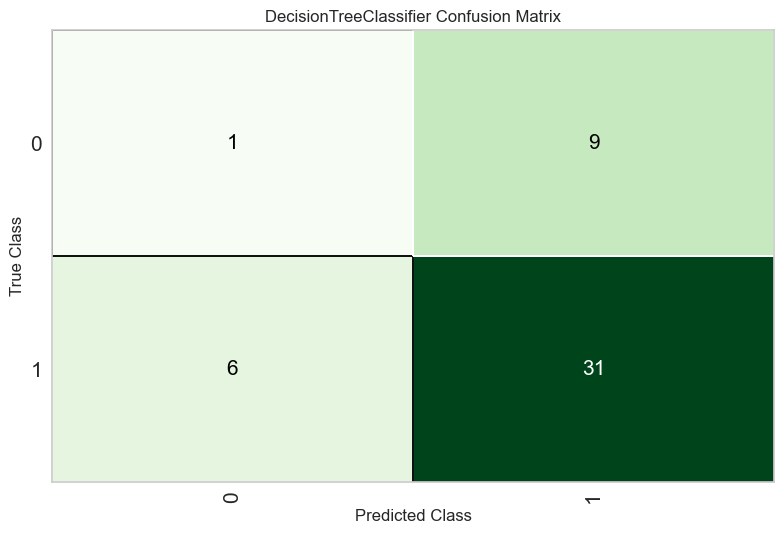

In [47]:
# plot confusion matrix
plot_model(dt, plot = 'confusion_matrix')

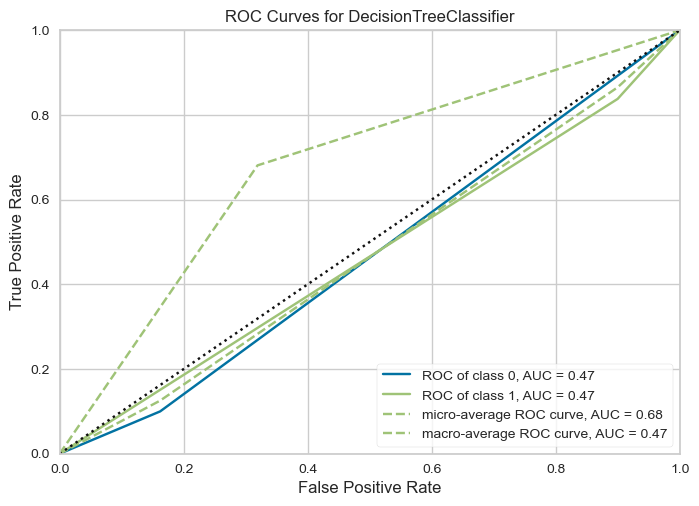

In [48]:
# plot AUC
plot_model(dt, plot = 'auc')

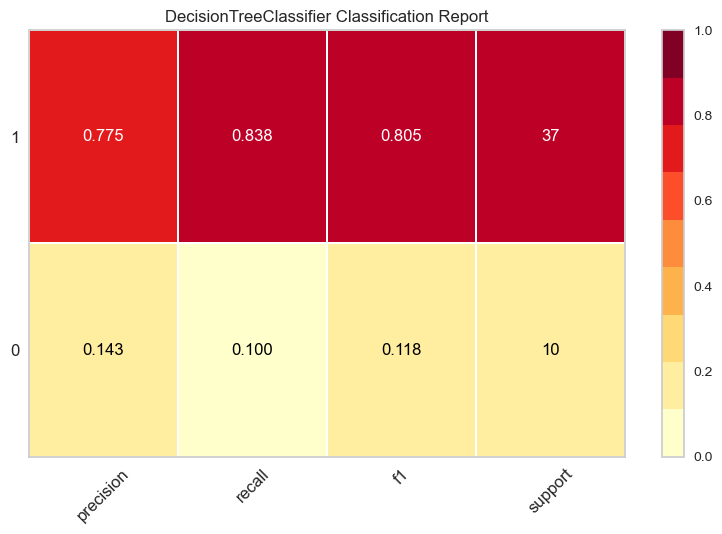

In [49]:
# plot class report
plot_model(dt, plot = 'class_report')

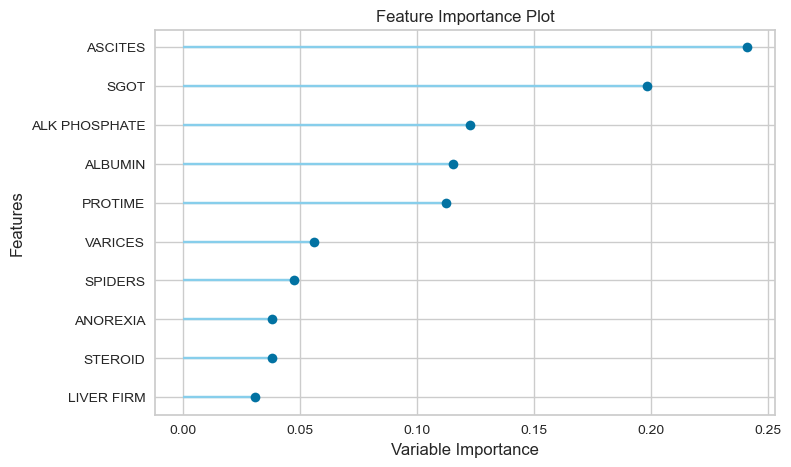

In [50]:
# plot feature importance
plot_model(dt, plot = 'feature')

## Evaluate Model 

In [51]:
# evaluate model 
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [52]:
# finalize a model
finalize_model(dt)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AGE', 'STEROID', 'ANTIVIRALS',
                                             'FATIGUE', 'MALAISE', 'ANOREXIA',
                                             'LIVER BIG', 'LIVER FIRM',
                                             'SPLEEN PALPABL...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)

## Prediction

In [53]:
# predict on test set
holdout_pred = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6809,0.4689,0.8378,0.7750,0.8052,-0.0698,-0.0715


In [54]:
# show predictions df
holdout_pred.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class,prediction_label,prediction_score
122,42,1,2,2,2,2,2,2,2,1,...,2,1.0,85,40,0.0,0,2,1,2,1.0
44,34,1,2,2,2,2,2,2,2,2,...,2,0.0,0,86,0.0,0,1,1,2,1.0
112,52,1,1,2,1,2,2,2,2,2,...,2,1.0,85,30,4.0,0,2,1,2,1.0
75,32,1,1,1,1,1,2,2,2,2,...,2,1.0,55,45,4.0,56,1,1,2,1.0
150,46,1,2,2,1,1,1,2,2,2,...,1,7.0,0,242,3.0,50,2,0,2,1.0


In [55]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('Class', axis=1, inplace=True)
new_data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.0,135,42,3.0,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.0,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.0,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [56]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,prediction_label,prediction_score
0,30,2,1,2,2,2,2,1,2,2,...,2,2,1.0,85,18,4.0,0,1,2,1.0
1,50,1,1,2,1,2,2,1,2,2,...,2,2,0.0,135,42,3.0,0,1,2,1.0
2,78,1,2,2,1,2,2,2,2,2,...,2,2,0.0,96,32,4.0,0,1,2,1.0
3,31,1,0,1,2,2,2,2,2,2,...,2,2,0.0,46,52,4.0,80,1,2,1.0
4,34,1,2,2,2,2,2,2,2,2,...,2,2,1.0,0,200,4.0,0,1,2,1.0


## Save Model 

In [57]:
# save pipeline
save_model(dt, '../models/hepatitis')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AGE', 'STEROID', 'ANTIVIRALS',
                                              'FATIGUE', 'MALAISE', 'ANOREXIA',
                                              'LIVER BIG', 'LIVER FIRM',
                                              'SPLEEN PALPABL...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features

In [58]:
# load pipeline
loaded_best_pipeline = load_model('../models/hepatitis')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AGE', 'STEROID', 'ANTIVIRALS',
                                             'FATIGUE', 'MALAISE', 'ANOREXIA',
                                             'LIVER BIG', 'LIVER FIRM',
                                             'SPLEEN PALPABL...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)